In [1]:
import pandas as pd
df = pd.read_csv('churn_data.csv')
print("Shape:",df.shape)
df.head()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
print("Missing values =")
print(df.isna().sum())

Missing values =
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [3]:
df = df.dropna(subset = ['TotalCharges']).reset_index(drop=True)

Churn distribution (counts):
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Churn distribution (%):
Churn
No     73.42
Yes    26.58
Name: proportion, dtype: float64


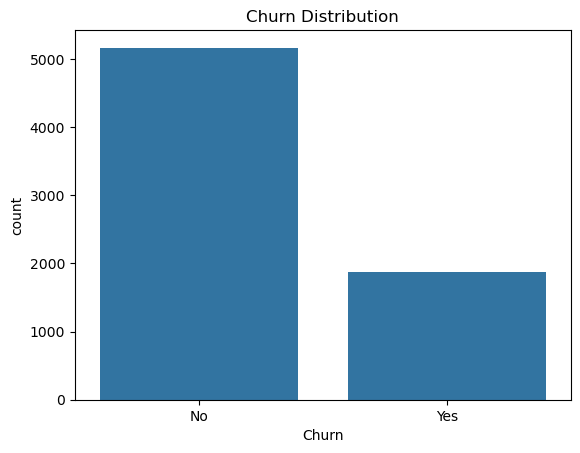

In [4]:
print("Churn distribution (counts):")
print(df['Churn'].value_counts())
print("\nChurn distribution (%):")
print(df['Churn'].value_counts(normalize=True).mul(100).round(2))
# Plot target distribution
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Drop ID and target
X = df.drop(columns=['customerID', 'Churn'])
y = (df['Churn'] == 'Yes').astype(int)  # Yes = 1, No = 0

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X.shape)

Shape after encoding: (7032, 30)


In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Logistic Regression baseline
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:,1]

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

ROC-AUC: 0.8356727976766699
Confusion Matrix:
 [[916 117]
 [159 215]]
